In [1]:
# 나눔고딕 폰트 설치 및 설정
!apt-get update -qq
!apt-get install fonts-nanum -qq
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no

In [2]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import matplotlib.font_manager as fm

# 폰트 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=10)
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

Epoch 1: Loss=9.9328
Epoch 20: Loss=0.4118
Epoch 40: Loss=0.3920
Epoch 60: Loss=0.3923


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54617 (\N{HANGUL SYLLABLE HAG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49845 (\N{HANGUL SYLLABLE SEUB}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44257 (\N{HANGUL SYLLABLE GOG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49440 (\N{HANGUL SYLLABLE SEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


Epoch 80: Loss=0.3498


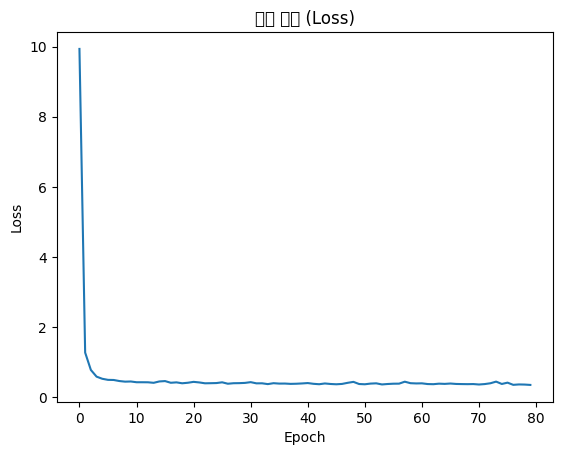

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54408 (\N{HANGUL SYLLABLE PUM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51656 (\N{HANGUL SYLLABLE JIL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51216 (\N{HANGUL SYLLABLE JEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr

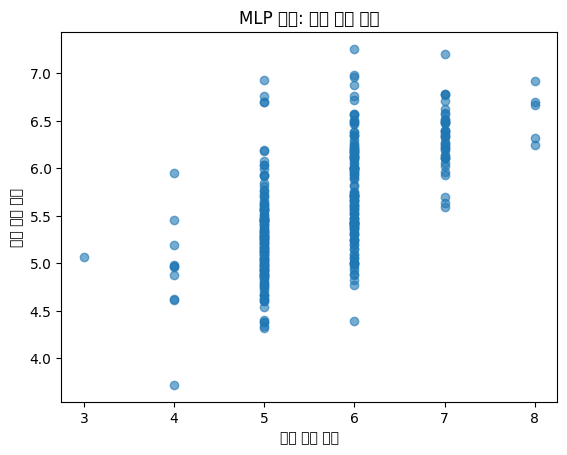

Mean Squared Error (MSE): 0.419
Mean Absolute Error (MAE): 0.513
R² Score: 0.359

예시 (5개):
입력: [-0.36  0.18 -0.98 -0.03  0.56 -0.18 -0.01  0.19 -0.46  0.01 -0.77] | 실제: 6.0 | 예측: 5.43
입력: [-0.3  -0.16 -0.52 -0.67 -0.12  0.49  1.69 -0.4   0.51 -1.05 -0.87] | 실제: 5.0 | 예측: 5.09
입력: [ 1.37  0.79 -0.26  0.11  0.42  0.11 -0.38  1.94 -0.2   1.9  -0.49] | 실제: 6.0 | 예측: 6.05
입력: [ 0.1  -0.38  0.2  -0.2  -0.2   1.54  0.35  0.66  0.12 -0.7  -0.58] | 실제: 5.0 | 예측: 5.48
입력: [-0.93 -0.38 -0.16 -0.6  -0.22  0.2  -0.38 -1.03  0.51 -0.34  0.17] | 실제: 6.0 | 예측: 5.53


In [3]:


# 1. 데이터 불러오기 (OpenML, 'wine-quality-red')
data = fetch_openml(name='wine-quality-red', version=1, as_frame=True)
X = data.data.values      # (1599, 11)
y = data.target.values    # (1599,)
y = y.astype(np.float32)

# 2. 데이터 표준화
scaler = StandardScaler()
X = scaler.fit_transform(X)

# 3. 훈련/테스트 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Dataset 클래스 정의
class WineDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y, dtype=torch.float32).view(-1,1)
    def __len__(self):
        return len(self.X)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = WineDataset(X_train, y_train)
test_ds = WineDataset(X_test, y_test)
train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

# 5. MLP 회귀 모델
class MLPRegressor(nn.Module):
    def __init__(self, in_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(in_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    def forward(self, x):
        return self.net(x)

model = MLPRegressor(X.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

# 6. 학습
losses = []
for epoch in range(80):
    model.train()
    epoch_loss = 0
    for xb, yb in train_loader:
        pred = model(xb)
        loss = criterion(pred, yb)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss/len(train_loader))
    if (epoch+1)%20==0 or epoch==0:
        print(f"Epoch {epoch+1}: Loss={epoch_loss/len(train_loader):.4f}")

plt.plot(losses)
plt.title("학습 곡선 (Loss)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

# 7. 테스트셋 예측 및 평가지표
model.eval()
with torch.no_grad():
    y_pred = model(torch.tensor(X_test, dtype=torch.float32)).view(-1).numpy()

# 산점도 시각화
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("실제 품질 점수")
plt.ylabel("예측 품질 점수")
plt.title("MLP 회귀: 와인 품질 예측")
plt.show()

# 8. 평가지표(MSE, MAE, R²) 계산 및 출력
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2  = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R² Score: {r2:.3f}")

# 예시 예측값
print("\n예시 (5개):")
for i in range(5):
    print(f"입력: {np.round(X_test[i],2)} | 실제: {y_test[i]} | 예측: {y_pred[i]:.2f}")
